In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

In [2]:
# set up solver
solver_config = dict(
    n=256,
    order=8,
    courant=0.8,
    snapshot_dt=1,
    num_snapshots=1,
)

# set up problem
problem_config = dict(
    u0="composite",
    x=(0, 1),
    v=1,
    PAD=(0, 1),
    bc="periodic",
)

# set up slope limiter
limiter_config = dict(
    apriori_limiting=True,
    mpp_lite=True,
    modify_time_step=True,
    mpp_tolerance=1e-12,
    SED=True,
)

# execute solver
solver = AdvectionSolver(
    **solver_config,
    **problem_config,
    **limiter_config,
    load=False,
)
solver.rkorder()

# print mpp violations
solver.report_mpp_violations()

New solution instance...


100%|██████████| 1.0/1 [00:00]                 



Wrote a solution up to t = 1.0 located at data/solutions/composite_periodic_None_256_(0, 1)_None_0_1_1_1_0.8_8_gauss-legendre_True_True_False_moncen_False_False_False_False_True_1e-05_(0, 1)_None_False_True_1e-12_True_rk4_1.pkl


                       worst     frequency          mean
         upper   5.65143e-04   0.00000e+00              
         lower  -2.12347e-13   7.03364e-02              
         total  -2.12347e-13   7.03364e-02   4.63133e-13



Plot solution

Text(0, 0.5, '$\\overline{u}$')

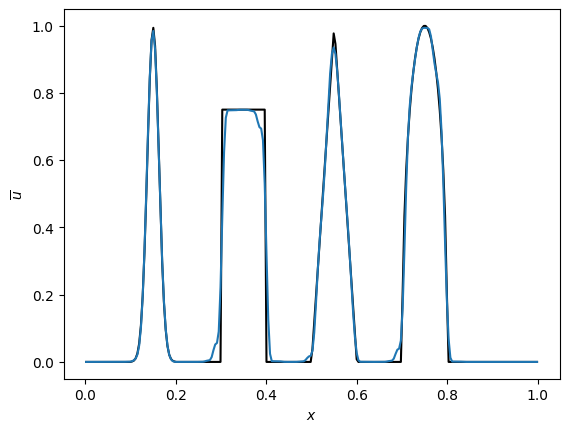

In [3]:
plt.plot(solver.x, solver.snapshots[0]["u"], "k")
plt.plot(solver.x, solver.snapshots[-1]["u"])
plt.xlabel("$x$")
plt.ylabel("$\overline{u}$")

Plot $1-\theta$ for _a priori_ slope limiting

Text(0, 0.5, '$1 - \\Theta$')

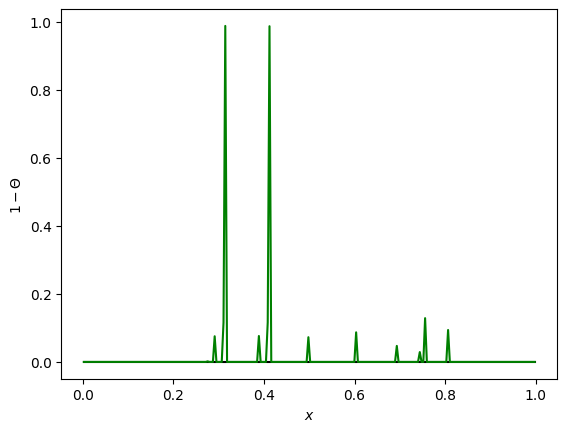

In [6]:
eps = 1e-3
hide_small_violations = np.logical_and(
    solver.snapshots[-1]["abs(M_ij - u)"] < eps,
    solver.snapshots[-1]["abs(m_ij - u)"] < eps,
)

plt.plot(solver.x, 1 - solver.snapshots[0]["theta"], "k")
plt.plot(
    solver.x, 1 - np.where(hide_small_violations, 1, solver.snapshots[-1]["theta"]), "g"
)
plt.xlabel("$x$")
plt.ylabel("$1 - \Theta$")

Plot troubled cell inditator for _a posteriori_ slope limiting

Text(0, 0.5, 'Troubled cell indication')

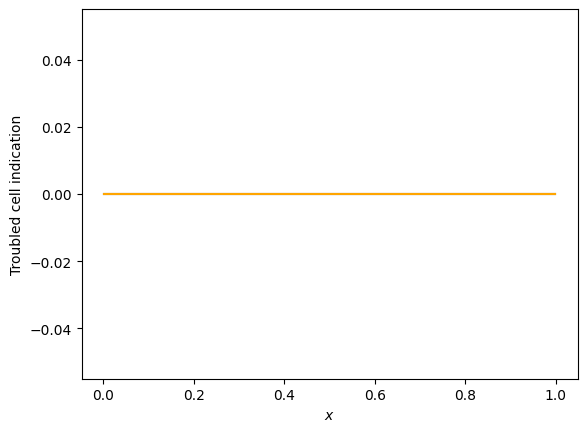

In [5]:
eps = 1e-5
hide_small_violations = np.logical_and(
    solver.snapshots[-1]["unew - M"] < eps,
    solver.snapshots[-1]["m - unew"] < eps,
)

plt.plot(solver.x, solver.snapshots[0]["trouble"], "k")
plt.plot(
    solver.x,
    np.where(hide_small_violations, 0, solver.snapshots[-1]["trouble"]),
    "orange",
)
plt.xlabel("$x$")
plt.ylabel("Troubled cell indication")